### Data cleaning OpenSky

In [ ]:
import pandas as pd
import json

In [ ]:
data2 = pd.read_csv("../Data/Data_OpenSky/aircraft-database-complete-2022-11.csv", dtype= 'unicode')
data_filtered = data2.filter( items = ["icao_address", "tale_nb", "type_avion", "jet_prive", "serial_nb"])
airplane_tls = []
data_filtered_no_na = data_filtered.dropna(subset=['icao_address','type_avion'])
data_filtered_no_na.to_csv('../Data/Data_OpenSky/new_opensky_11_2022.csv',na_rep='Unknown')

### Construire les listes des altitudes et vitesses

In [1]:
import pandas as pd
import json
import math
import datetime as dt

In [2]:

def haversine_distance(lat1, long1, lat2, long2):
    R = 6371  # radius of Earth in kilometers
    lat1, long1, lat2, long2 = map(math.radians, [lat1, long1, lat2, long2])
    dlat = lat2 - lat1
    dlong = long2 - long1
    a = (math.sin(dlat/2)**2) + math.cos(lat1) * math.cos(lat2) * (math.sin(dlong/2)**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    return d

In [7]:
latitude_aero = 43.6293     #TOULOUSE
longitude_aero = 1.3676 
lat = 48.8567               #PARIS
long = 2.3508

distance = haversine_distance(latitude_aero, longitude_aero, lat, long)
print(distance)

586.14293769134


In [41]:
data = pd.read_csv(r'C:\Users\chell\Desktop\3SN\PL\ADSB\2022-11-25.csv.gz',compression='gzip', engine='python', error_bad_lines=False)

C:\Users\chell\AppData\Local\Temp\ipykernel_118828\3793182073.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(r'C:\Users\chell\Desktop\3SN\PL\ADSB\2022-11-25.csv.gz',compression='gzip', engine='python', error_bad_lines=False)


In [42]:

alt_list = []
lat_list = []
long_list = []
distance_aero_list = []
surf_list = []
rate_list = []
indice_list = []
flightid_list = []
sonore_list = []

latitude_aero = 43.6293
longitude_aero = 1.3676 

data['datetime'] = pd.to_datetime(data['timestamp_s'], unit='s')

for i in range (len(data)) :
   icao_addr = data.icao_adress_hex[i]
   jsn = data.data[i]
   jsn2 = json.loads(jsn)
   try:
      alt = jsn2["05_Altitude (ft)"]
      long = jsn2["05_Airborne Longitude (°)"]
      lat = jsn2["05_Airborne Latitude (°)"]
      vitesse_surf = jsn2["09_Surface Speed Calculated (knots)"]
      vitesse_rate = jsn2["09_sub1_Vertical Rate_Meaning"]
      flight_id = jsn2["08_Flight_ID"]
      air_sol = jsn2["AIR_SOL"]
      if (air_sol == 'SOL') : 
         indice_list.append(icao_addr)

      #calcul de la distance
      distance = haversine_distance(latitude_aero, longitude_aero, lat, long)
      
      #calcul du niveau sonore
      niveau = 57 + 20 * math.log10(vitesse_surf) - 15 * math.log10(alt) - 2 * math.log10(distance)

      if (vitesse_rate == "ZERO") : 
         rate_list.append(0)
      else :
         vitesse_split = vitesse_rate.split()
         if (vitesse_split[0] == "-") : 
            rate_list.append(-int(vitesse_split[1]))
         else : 
            rate_list.append(int(vitesse_split[1]))


      alt_list.append(alt)
      long_list.append(long)
      lat_list.append(lat)
      distance_aero_list.append(distance)
      surf_list.append(int(vitesse_surf))
      flightid_list.append(flight_id)
      sonore_list.append(niveau)
      
   except:
      #print("erreur")
      alt_list.append(-100)
      long_list.append(-100)
      lat_list.append(-100)
      surf_list.append(-100)
      rate_list.append(-100)
      distance_aero_list.append(-100)
      sonore_list.append(-100)
      flightid_list.append("")     # A verifier


data.loc[:, 'altitude'] = alt_list
data.loc[:, 'longitude'] = long_list
data.loc[:, 'latitude'] = lat_list
data.loc[:, 'distance_aero'] = distance_aero_list
data.loc[:, 'TAS'] = surf_list
data.loc[:, 'vertical_rate'] = rate_list
data.loc[:, 'Flight_ID'] = flightid_list
data.loc[:, 'niveau_sonore'] = sonore_list



data.drop(data[data['altitude']==-100].index,  inplace = True)
data = data.dropna(subset=['longitude','latitude'])

data

icao_adress_hex  timestamp_s  \
0                30019c   1669420799   
1                4007f4   1669420799   
3                471a76   1669420799   
4                600828   1669337981   
5                34648d   1669337980   
...                 ...          ...   
4212078          3cc00c   1669258149   
4212079          44ccc3   1669258149   
4212080          484410   1669258149   
4212083          3cc00c   1669258148   
4212085          484410   1669258148   

                                                      data  \
0        {"05_Airborne Latitude (°)":43.4029541015625,"...   
1        {"05_Airborne Latitude (°)":42.42957163665254,...   
3        {"05_Airborne Latitude (°)":43.359359482587394...   
4        {"05_Airborne Latitude (°)":46.352142333984375...   
5        {"05_Airborne Latitude (°)":46.79081726074219,...   
...                                                    ...   
4212078  {"05_Airborne Latitude (°)":43.57447737354343,...   
4212079  {"05_Airborne Latitude (°)":43.80807650291313,...   
4212080  {"05_Airborne Latitude (°)":43.35772705078125,...   
4212083  {"05_Airborne Latitude (°)":43.574432373046875...   
4212085  {"05_Airborne Latitude (°)":43.35605427370233,...   

                   datetime  altitude  longitude   latitude  distance_aero  \
0       2022-11-25 23:59:59     34025   0.980977  43.402954      40.067246   
1       2022-11-25 23:59:59     35000   2.019504  42.429572     143.541036   
3       2022-11-25 23:59:59     21000   0.120457  43.359359     104.982614   
4       2022-11-25 00:59:41     32000   0.826520  46.352142     305.739357   
5       2022-11-25 00:59:40     31000   2.061410  46.790817     355.717181   
...                     ...       ...        ...        ...            ...   
4212078 2022-11-24 02:49:09      9975   0.878252  43.574477      39.871814   
4212079 2022-11-24 02:49:09     40000  -1.556004  43.808077     235.783049   
4212080 2022-11-24 02:49:09     40000   1.359494  43.357727      30.204612   
4212083 2022-11-24 02:49:08      9975   0.876607  43.574432      40.003538   
4212085 2022-11-24 02:49:08     40000   1.359427  43.356054      30.390690   

         TAS  vertical_rate Flight_ID  niveau_sonore  
0        551              0   NOS4403      40.647399  
1        458              0     BAW59      37.749556  
3        213              0    FRF901      34.730190  
4        415             64   AZQ4116      36.821273  
5        395              0   SWN5629      36.471426  
...      ...            ...       ...            ...  
4212078  267              0    AZE41B      42.347392  
4212079  495              0   BEL359R      37.118004  
4212080  429              0    KLM588      37.660010  
4212083  267              0    AZE41B      42.344527  
4212085  429              0    KLM588      37.654676  

[3846158 rows x 12 columns]

In [43]:
indice_list = [*set(indice_list)]
print(len(indice_list))
indice_list

100


['3801da',
 '380c5a',
 '38a05b',
 '396677',
 '3c658c',
 '44ce62',
 '3c5eec',
 '395d67',
 '45ce56',
 '389e1b',
 '4401c3',
 '4d225f',
 '38a03b',
 '398101',
 '3810ba',
 '3c6447',
 '39c466',
 '394ea2',
 '440051',
 '49529a',
 '3950c9',
 '3991e1',
 '4401d1',
 '484f80',
 '388e5b',
 '0a0022',
 '394c0a',
 '3c6743',
 '405ee0',
 '3461ce',
 '3b77ed',
 '3894db',
 '44ce6e',
 '02a1b3',
 '400a26',
 '3985a9',
 '0a0076',
 '39ac45',
 '345583',
 '380fda',
 '39b96e',
 '3c6597',
 '4cafc2',
 '440128',
 '38181a',
 '3451d8',
 '3c6748',
 '4401e4',
 'e49a46',
 '3946e1',
 '34648d',
 '3944f0',
 '398570',
 '3985a5',
 '394a63',
 '394a65',
 '45ab44',
 '3950cc',
 'a24f34',
 '3461cf',
 '395d69',
 '394c14',
 '3950d0',
 '3c70b1',
 '3985a7',
 '394a62',
 '34364e',
 '38137a',
 '44ce6f',
 '484c1b',
 '4ca737',
 '440036',
 '495212',
 '4ca7b7',
 '393324',
 '39e686',
 '39a56f',
 '39b40a',
 '3c6443',
 '398569',
 '394c10',
 '3950ce',
 '3817fa',
 '38185a',
 '393322',
 '3c644c',
 '406ae3',
 '440172',
 '38c53b',
 '020145',
 '388ddb',

In [44]:
#icao_liste = data.iloc[indice_list].icao_adress_hex.drop_duplicates()
#indice_list.drop_duplicates()
data = data[ data['icao_adress_hex'].isin(indice_list) ]
data

icao_adress_hex  timestamp_s  \
5                34648d   1669337980   
7                34648d   1669337979   
9                34648d   1669337978   
12               34648d   1669337976   
14               34648d   1669337975   
...                 ...          ...   
4152084          394ea2   1669265774   
4152138          394ea2   1669265764   
4152170          394ea2   1669265758   
4152228          394ea2   1669265748   
4152252          394ea2   1669265744   

                                                      data  \
5        {"05_Airborne Latitude (°)":46.79081726074219,...   
7        {"05_Airborne Latitude (°)":46.79277323060116,...   
9        {"05_Airborne Latitude (°)":46.79277323060116,...   
12       {"05_Airborne Latitude (°)":46.79658508300781,...   
14       {"05_Airborne Latitude (°)":46.79859226032839,...   
...                                                    ...   
4152084  {"05_Airborne Latitude (°)":43.49026437533104,...   
4152138  {"05_Airborne Latitude (°)":43.49026437533104,...   
4152170  {"05_Airborne Latitude (°)":43.49026437533104,...   
4152228  {"05_Airborne Latitude (°)":43.49026437533104,...   
4152252  {"05_Airborne Latitude (°)":43.49026437533104,...   

                   datetime  altitude  longitude   latitude  distance_aero  \
5       2022-11-25 00:59:40     31000   2.061410  46.790817     355.717181   
7       2022-11-25 00:59:39     31000   2.061653  46.792773     355.934879   
9       2022-11-25 00:59:38     31000   2.061653  46.792773     355.934879   
12      2022-11-25 00:59:36     31000   2.062147  46.796585     356.359387   
14      2022-11-25 00:59:35     31000   2.062408  46.798592     356.582930   
...                     ...       ...        ...        ...            ...   
4152084 2022-11-24 04:56:14     19000   3.366329  43.490264     161.789965   
4152138 2022-11-24 04:56:04     19000   3.366329  43.490264     161.789965   
4152170 2022-11-24 04:55:58     19000   3.366329  43.490264     161.789965   
4152228 2022-11-24 04:55:48     19000   3.366329  43.490264     161.789965   
4152252 2022-11-24 04:55:44     19000   3.366329  43.490264     161.789965   

         TAS  vertical_rate Flight_ID  niveau_sonore  
5        395              0   SWN5629      36.471426  
7        395              0   SWN5629      36.470895  
9        395              0   SWN5629      36.470895  
12       395              0   SWN5629      36.469859  
14       395              0   SWN5629      36.469315  
...      ...            ...       ...            ...  
4152084  337              0   TJT15ST      38.971746  
4152138  337              0   TJT15ST      38.971746  
4152170  337              0   TJT15ST      38.971746  
4152228  337              0   TJT15ST      38.971746  
4152252  337              0   TJT15ST      38.971746  

[452190 rows x 12 columns]

In [45]:
data_filter = data.filter( items = ["icao_adress_hex", "Flight_ID", "timestamp_s", "datetime", "altitude", "longitude", "latitude", "distance_aero", "TAS", "vertical_rate", "niveau_sonore"])
data_group = data_filter.groupby(['icao_adress_hex', 'Flight_ID']).agg(lambda x: x.tolist())
len(data_group)
data_group

timestamp_s  \
icao_adress_hex Flight_ID                                                      
020145          MAC341H    [1669283573, 1669276498, 1669276497, 166927649...   
                MAC342     [1669300860, 1669300859, 1669286110, 166928610...   
                MAC357E    [1669302848, 1669302838, 1669302833, 166930283...   
                MAC358A    [1669308262, 1669308257, 1669308256, 166930825...   
02a1b3          LBT514     [1669306536, 1669306535, 1669306534, 166930653...   
...                                                                      ...   
4d225f          RYR73YN    [1669322083, 1669322081, 1669322077, 166932207...   
                RYR865H    [1669287780, 1669287779, 1669287778, 166928777...   
                RYR98YA    [1669306347, 1669306346, 1669306344, 166930634...   
                RYR9ME     [1669308892, 1669308890, 1669308889, 166930888...   
a24f34          N248RF     [1669310294, 1669310292, 1669310290, 166931028...   

                                                                    datetime  \
icao_adress_hex Flight_ID                                                      
020145          MAC341H    [2022-11-24 09:52:53, 2022-11-24 07:54:58, 202...   
                MAC342     [2022-11-24 14:41:00, 2022-11-24 14:40:59, 202...   
                MAC357E    [2022-11-24 15:14:08, 2022-11-24 15:13:58, 202...   
                MAC358A    [2022-11-24 16:44:22, 2022-11-24 16:44:17, 202...   
02a1b3          LBT514     [2022-11-24 16:15:36, 2022-11-24 16:15:35, 202...   
...                                                                      ...   
4d225f          RYR73YN    [2022-11-24 20:34:43, 2022-11-24 20:34:41, 202...   
                RYR865H    [2022-11-24 11:03:00, 2022-11-24 11:02:59, 202...   
                RYR98YA    [2022-11-24 16:12:27, 2022-11-24 16:12:26, 202...   
                RYR9ME     [2022-11-24 16:54:52, 2022-11-24 16:54:50, 202...   
a24f34          N248RF     [2022-11-24 17:18:14, 2022-11-24 17:18:12, 202...   

                                                                    altitude  \
icao_adress_hex Flight_ID                                                      
020145          MAC341H    [28825, 24975, 24975, 24975, 25025, 25025, 250...   
                MAC342     [38000, 38000, 35000, 35000, 35000, 35000, 350...   
                MAC357E    [425, 425, 425, 425, 425, 425, 425, 425, 425, ...   
                MAC358A    [37000, 37000, 37000, 37025, 37000, 37000, 370...   
02a1b3          LBT514     [400, 400, 400, 400, 400, 400, 400, 400, 400, ...   
...                                                                      ...   
4d225f          RYR73YN    [35000, 35000, 35000, 35000, 35000, 35000, 350...   
                RYR865H    [325, 325, 325, 325, 325, 325, 325, 325, 325, ...   
                RYR98YA    [38000, 38000, 38000, 38000, 38000, 38000, 380...   
                RYR9ME     [400, 400, 400, 400, 400, 400, 400, 400, 400, ...   
a24f34          N248RF     [34000, 34000, 34000, 34000, 34000, 34000, 340...   

                                                                   longitude  \
icao_adress_hex Flight_ID                                                      
020145          MAC341H    [5.154353550502232, 4.839281354631696, 4.83928...   
                MAC342     [-1.6514622887899577, -1.6514622887899577, 1.6...   
                MAC357E    [1.3541303362165178, 1.3541303362165178, 1.354...   
                MAC358A    [-1.2320656000181316, -1.2320656000181316, -1....   
02a1b3          LBT514     [1.3538094454033431, 1.3538094454033431, 1.353...   
...                                                                      ...   
4d225f          RYR73YN    [2.2004241943359375, 2.2004241943359375, 2.200...   
                RYR865H    [1.354384311409884, 1.354384311409884, 1.35438...   
                RYR98YA    [-1.6485879587572185, -1.6516539107921062, -1....   
                RYR9ME     [1.3556998116629464, 1.355699811662

In [47]:
#calcul de l'indice de performance sonore

def sum_sonore(x):
    return 10**(x/10)

list_indice = []
for i in range (len(data_group)) :
   
    list_niv = list(map(sum_sonore, data_group['niveau_sonore'][i]))
    indice_perfo = 10*math.log10(sum(list_niv))
    list_indice.append(indice_perfo)


data_group.loc[:, 'indice_sonore'] = list_indice

data_group = data_group.drop(columns=['niveau_sonore'])

data_group

timestamp_s  \
icao_adress_hex Flight_ID                                                      
020145          MAC341H    [1669283573, 1669276498, 1669276497, 166927649...   
                MAC342     [1669300860, 1669300859, 1669286110, 166928610...   
                MAC357E    [1669302848, 1669302838, 1669302833, 166930283...   
                MAC358A    [1669308262, 1669308257, 1669308256, 166930825...   
02a1b3          LBT514     [1669306536, 1669306535, 1669306534, 166930653...   
...                                                                      ...   
4d225f          RYR73YN    [1669322083, 1669322081, 1669322077, 166932207...   
                RYR865H    [1669287780, 1669287779, 1669287778, 166928777...   
                RYR98YA    [1669306347, 1669306346, 1669306344, 166930634...   
                RYR9ME     [1669308892, 1669308890, 1669308889, 166930888...   
a24f34          N248RF     [1669310294, 1669310292, 1669310290, 166931028...   

                                                                    datetime  \
icao_adress_hex Flight_ID                                                      
020145          MAC341H    [2022-11-24 09:52:53, 2022-11-24 07:54:58, 202...   
                MAC342     [2022-11-24 14:41:00, 2022-11-24 14:40:59, 202...   
                MAC357E    [2022-11-24 15:14:08, 2022-11-24 15:13:58, 202...   
                MAC358A    [2022-11-24 16:44:22, 2022-11-24 16:44:17, 202...   
02a1b3          LBT514     [2022-11-24 16:15:36, 2022-11-24 16:15:35, 202...   
...                                                                      ...   
4d225f          RYR73YN    [2022-11-24 20:34:43, 2022-11-24 20:34:41, 202...   
                RYR865H    [2022-11-24 11:03:00, 2022-11-24 11:02:59, 202...   
                RYR98YA    [2022-11-24 16:12:27, 2022-11-24 16:12:26, 202...   
                RYR9ME     [2022-11-24 16:54:52, 2022-11-24 16:54:50, 202...   
a24f34          N248RF     [2022-11-24 17:18:14, 2022-11-24 17:18:12, 202...   

                                                                    altitude  \
icao_adress_hex Flight_ID                                                      
020145          MAC341H    [28825, 24975, 24975, 24975, 25025, 25025, 250...   
                MAC342     [38000, 38000, 35000, 35000, 35000, 35000, 350...   
                MAC357E    [425, 425, 425, 425, 425, 425, 425, 425, 425, ...   
                MAC358A    [37000, 37000, 37000, 37025, 37000, 37000, 370...   
02a1b3          LBT514     [400, 400, 400, 400, 400, 400, 400, 400, 400, ...   
...                                                                      ...   
4d225f          RYR73YN    [35000, 35000, 35000, 35000, 35000, 35000, 350...   
                RYR865H    [325, 325, 325, 325, 325, 325, 325, 325, 325, ...   
                RYR98YA    [38000, 38000, 38000, 38000, 38000, 38000, 380...   
                RYR9ME     [400, 400, 400, 400, 400, 400, 400, 400, 400, ...   
a24f34          N248RF     [34000, 34000, 34000, 34000, 34000, 34000, 340...   

                                                                   longitude  \
icao_adress_hex Flight_ID                                                      
020145          MAC341H    [5.154353550502232, 4.839281354631696, 4.83928...   
                MAC342     [-1.6514622887899577, -1.6514622887899577, 1.6...   
                MAC357E    [1.3541303362165178, 1.3541303362165178, 1.354...   
                MAC358A    [-1.2320656000181316, -1.2320656000181316, -1....   
02a1b3          LBT514     [1.3538094454033431, 1.3538094454033431, 1.353...   
...                                                                      ...   
4d225f          RYR73YN    [2.2004241943359375, 2.2004241943359375, 2.200...   
                RYR865H    [1.354384311409884, 1.354384311409884, 1.35438...   
                RYR98YA    [-1.6485879587572185, -1.6516539107921062, -1....   
                RYR9ME     [1.3556998116629464, 1.355699811662

In [48]:
data_group.to_csv('../Data/ADSB_cleaned_11_2022/data_group_25-11.csv')

### Jointure : données ADSB avec OpenSky

In [1]:
import pandas as pd

csv_ADSB = '../Data/ADSB_cleaned_11_2022/data_group_25-11.csv'
data = pd.read_csv(csv_ADSB)

data2 = pd.read_csv("../Data/Data_OpenSky/new_opensky_11_2022.csv")
data_new = data2.set_index('icao_address').join(data.set_index('icao_adress_hex'))

data_new_na = data_new.dropna(subset=['timestamp_s','altitude', 'TAS', 'vertical_rate'])

data_new_na = data_new_na.loc[:, ~data_new_na.columns.str.contains('^Unnamed')]

#data_new_na.to_csv('data_join.csv')
data_new_na.to_csv('../Data/ADSB_cleaned_11_2022/data_join_25-11.csv')

print(len(data_new_na))
data_new_na



256


tale_nb type_avion                            jet_prive  serial_nb  \
020145  CN-NMO       A320                           Air Arabia    Unknown   
020145  CN-NMO       A320                           Air Arabia    Unknown   
020145  CN-NMO       A320                           Air Arabia    Unknown   
020145  CN-NMO       A320                           Air Arabia    Unknown   
02a1b3  TS-INT       A320                              Unknown    Unknown   
...        ...        ...                                  ...        ...   
4ca7b7  EI-EGB       B738  Ryanair Designated Activity Company      38491   
4ca7b7  EI-EGB       B738  Ryanair Designated Activity Company      38491   
4cafc2  EI-GXG       B138                              Unknown    Unknown   
4cafc2  EI-GXG       B138                              Unknown    Unknown   
a24f34  N248RF       C25A          Staff Air Group Inc Trustee  525A-0199   

       Flight_ID                                        timestamp_s  \
020145   MAC341H  [1669283573, 1669276498, 1669276497, 166927649...   
020145    MAC342  [1669300860, 1669300859, 1669286110, 166928610...   
020145   MAC357E  [1669302848, 1669302838, 1669302833, 166930283...   
020145   MAC358A  [1669308262, 1669308257, 1669308256, 166930825...   
02a1b3    LBT514  [1669306536, 1669306535, 1669306534, 166930653...   
...          ...                                                ...   
4ca7b7    RYR4SL  [1669275055, 1669275053, 1669275052, 166927505...   
4ca7b7    RYR6FP  [1669300531, 1669300530, 1669300528, 166930052...   
4cafc2   RYR1042  [1669316387, 1669316386, 1669316385, 166931638...   
4cafc2    RYR1XC  [1669320937, 1669320936, 1669320935, 166932093...   
a24f34    N248RF  [1669310294, 1669310292, 1669310290, 166931028...   

                                                 datetime  \
020145  [Timestamp('2022-11-24 09:52:53'), Timestamp('...   
020145  [Timestamp('2022-11-24 14:41:00'), Timestamp('...   
020145  [Timestamp('2022-11-24 15:14:08'), Timestamp('...   
020145  [Timestamp('2022-11-24 16:44:22'), Timestamp('...   
02a1b3  [Timestamp('2022-11-24 16:15:36'), Timestamp('...   
...                                                   ...   
4ca7b7  [Timestamp('2022-11-24 07:30:55'), Timestamp('...   
4ca7b7  [Timestamp('2022-11-24 14:35:31'), Timestamp('...   
4cafc2  [Timestamp('2022-11-24 18:59:47'), Timestamp('...   
4cafc2  [Timestamp('2022-11-24 20:15:37'), Timestamp('...   
a24f34  [Timestamp('2022-11-24 17:18:14'), Timestamp('...   

                                                 altitude  \
020145  [28825, 24975, 24975, 24975, 25025, 25025, 250...   
020145  [38000, 38000, 35000, 35000, 35000, 35000, 350...   
020145  [425, 425, 425, 425, 425, 425, 425, 425, 425, ...   
020145  [37000, 37000, 37000, 37025, 37000, 37000, 370...   
02a1b3  [400, 400, 400, 400, 400, 400, 400, 400, 400, ...   
...                                                   ...   
4ca7b7  [325, 325, 325, 325, 325, 325, 350, 350, 400, ...   
4ca7b7  [35000, 35000, 35000, 35000, 35575, 35575, 355...   
4cafc2  [400, 400, 400, 400, 400, 400, 400, 400, 400, ...   
4cafc2  [39000, 39000, 39000, 39000, 39000, 39000, 390...   
a24f34  [34000, 34000, 34000, 34000, 34000, 34000, 340...   

                                                longitude  \
020145  [5.154353550502232, 4.839281354631696, 4.83928...   
020145  [-1.6514622887899577, -1.6514622887899577, 1.6...   
020145  [1.3541303362165178, 1.3541303362165178, 1.354...   
020145  [-1.2320656000181316, -1.2320656000181316, -1....   
02a1b3  [1.3538094454033431, 1.3538094454033431, 1.353...   
...                                                   ...   
4ca7b7  [1.353607177734375, 1.353607177734375, 1.35023...   
4ca7b7  [5.020621163504464, 5.020621163504464, 5.02062...   
4cafc2  [1.3568753974382268, 1.3568753974382268, 1.356...   
4cafc2  [-1.42303466796875, -1.42303466796875, -1.4223...   
a24f34  [4.6829893530868905, 4.678166087080793, 4.6706...   

                              

### OpenAP : Calcul des indicateurs environnementaux

In [15]:
import numpy as np
import ast
import matplotlib.pyplot as plt
from openap import Emission, FuelFlow, prop
from mpl_toolkits.mplot3d import Axes3D

In [17]:
aircraft = prop.aircraft('b734')      #pour vérifier si openap est bien installé
data_new_na = pd.read_csv("../Data/ADSB_cleaned_11_2022/data_join_25-11.csv")

In [19]:
def indicateurs_env(ac, tas, alt) : 
        
    aircraft = prop.aircraft(ac)
    fuelflow = FuelFlow(ac=ac)
    emission = Emission(ac=ac)

    tas_, alt_ = np.meshgrid(tas, alt)
    mass = aircraft["limits"]["MTOW"] * 0.85


    ff = fuelflow.enroute(mass=mass, tas=tas_, alt=alt_, path_angle=0)

    co2 = emission.co2(ff)
    h2o = emission.h2o(ff)
    sox = emission.sox(ff)
    nox = emission.nox(ff, tas=tas_, alt=alt_)
    co = emission.co(ff, tas=tas_, alt=alt_)
    hc = emission.hc(ff, tas=tas_, alt=alt_)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, ff)
    plt.title("fuel flow (kg/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, h2o)
    plt.title("H2O (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, co2)
    plt.title("CO2 (kg/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, sox)
    plt.title("SOx (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, nox)
    plt.title("NOx (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, co)
    plt.title("CO (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, hc)
    plt.title("HC (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

In [20]:
def indicateurs_env_ligne(data, nb):

    list_type = data.type_avion
    list_tas = data.TAS
    list_alt = data.altitude

    ac = list_type[nb]
    tas = ast.literal_eval(list_tas[nb])
    alt = ast.literal_eval(list_alt[nb])

    indicateurs_env(ac, tas, alt)

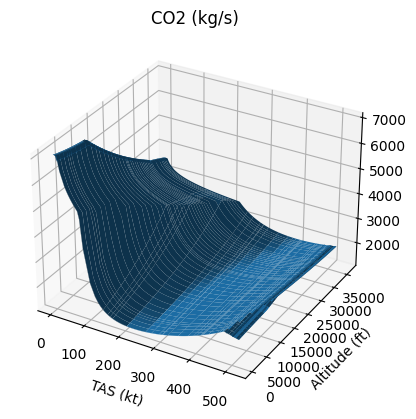

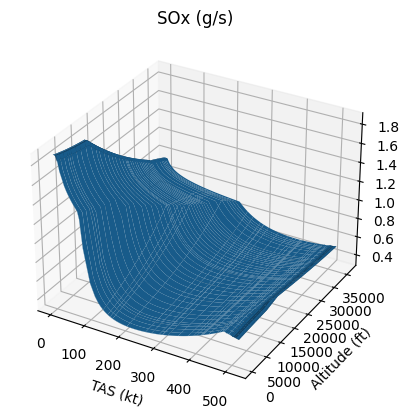

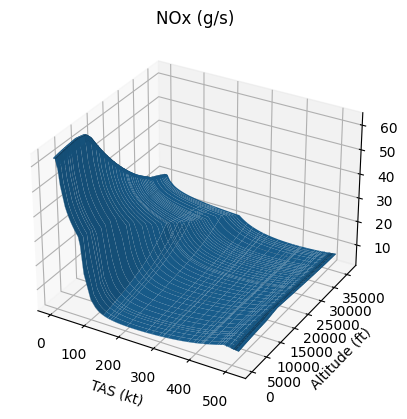

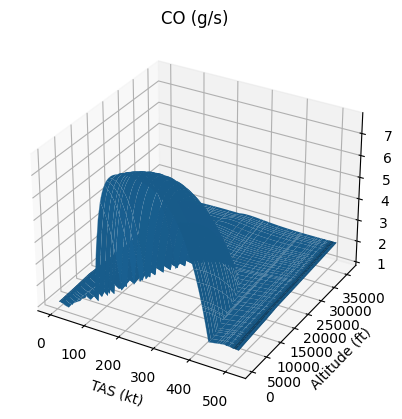

In [24]:
nb_ligne = 5
indicateurs_env_ligne(data_new_na, nb_ligne)

### Base de données pour classifier les indicateurs environnementaux

In [8]:
from openap import prop
import ast
import numpy as np
import matplotlib.pyplot as plt
from openap import Emission, FuelFlow, prop
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import json
import math

data_new_na = pd.read_csv("../Data/ADSB_cleaned_11_2022/data_toulouse_25_11.csv")

In [9]:

def indicateurs(ac, tas, alt) : 
        
    aircraft = prop.aircraft(ac)
    fuelflow = FuelFlow(ac=ac)
    emission = Emission(ac=ac)

    tas_, alt_ = np.meshgrid(tas, alt)
    mass = aircraft["limits"]["MTOW"] * 0.85


    ff = fuelflow.enroute(mass=mass, tas=tas_, alt=alt_, path_angle=0)
    ff = np.array(ff)

    co2 = emission.co2(ff)
    h2o = emission.h2o(ff)
    sox = emission.sox(ff)
    nox = emission.nox(ff, tas=tas_, alt=alt_)
    co = emission.co(ff, tas=tas_, alt=alt_)
    hc = emission.hc(ff, tas=tas_, alt=alt_)

    return np.mean(ff), np.mean(co2), np.mean(h2o), np.mean(sox), np.mean(nox), np.mean(co), np.mean(hc)

In [10]:
list_type = data_new_na.type_avion
list_tas = data_new_na.TAS
list_alt = data_new_na.altitude

#créer une dataframe :
df_conso = pd.DataFrame(columns=['type_avion', 'consommation_carburant'])
df_emission = pd.DataFrame(columns=['type_avion', 'emission_co2', 'emission_h2o', 'emission_sox', 'emission_nox', 'emission_co', 'emission_hc'])


In [39]:
ac = list_type[5]

aircraft = prop.aircraft(ac)
fuelflow = FuelFlow(ac=ac)
emission = Emission(ac=ac)


tas = ast.literal_eval(list_tas[5])
alt = ast.literal_eval(list_alt[5])

ff, co2, h2o, sox, nox, co, hc = indicateurs(ac, tas, alt)
print(ff)
print(co2)
print(h2o)

0.5482482456046812
1726.4337254091413
674.345342093758


In [11]:

for i in range (len(list_type)) : 
    print(i)
    try : 

        ac = list_type[i]

        aircraft = prop.aircraft(ac)
        fuelflow = FuelFlow(ac=ac)
        emission = Emission(ac=ac)

        tas = ast.literal_eval(list_tas[i])
        alt = ast.literal_eval(list_alt[i])

        ff, co2, h2o, sox, nox, co, hc = indicateurs(ac, tas, alt)
        
        df_conso.loc[i] = [ac, ff]
        df_emission.loc[i] = [ac, co2, h2o, sox, nox, co, hc]

    except:

        print('erreur')

df_conso

0
1
2
3
4
5
6
7
8
erreur
9
erreur
10
erreur
11
erreur
12
erreur
13
erreur
14
15
16
17
18
19
20
erreur
21
erreur
22
erreur
23
erreur
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
erreur
46
erreur
47
erreur
48
erreur
49
erreur
50
51
52
53
54
55
56
erreur
57
erreur
58
erreur
59
erreur
60
erreur
61
erreur
62
erreur
63
erreur
64
erreur
65
erreur
66
erreur
67
erreur
68
erreur
69
erreur
70
erreur
71
erreur
72
erreur
73
erreur
74
erreur
75
erreur
76
erreur
77
erreur
78
erreur
79
erreur
80
erreur
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
erreur
103
erreur
104
erreur
105
erreur
106
erreur
107
erreur
108
erreur
109
erreur
110
erreur
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
erreur
154
erreur
155
erreur
156
157
158
159
160
161
erreur
162
erreur
163
164
165
166
167
168
169
170
erreur
171
erreur
172
erreur


type_avion  consommation_carburant
0         A320                0.739266
1         A320                0.670882
2         A320                0.727441
3         A320                0.784117
4         B738                0.734349
..         ...                     ...
165       B738                0.758881
166       B738                0.835246
167       B738                0.659394
168       B738                0.700801
169       B738                0.743471

[116 rows x 2 columns]

In [12]:
df_emission

type_avion  emission_co2  emission_h2o  emission_sox  emission_nox  \
0         A320   2327.949095    909.297360      0.620984     10.593858   
1         A320   2112.608951    825.185459      0.563541      9.049850   
2         A320   2290.711455    894.752331      0.611050     11.418445   
3         A320   2469.183937    964.463716      0.658658     12.312122   
4         B738   2312.463539    903.248699      0.616853     10.815444   
..         ...           ...           ...           ...           ...   
165       B738   2389.714734    933.423030      0.637460     11.521013   
166       B738   2630.190901   1027.353067      0.701607     13.699641   
167       B738   2076.431047    811.054362      0.553891      7.896958   
168       B738   2206.823160    861.985547      0.588673      8.760895   
169       B738   2341.188911    914.468835      0.624515      9.969691   

     emission_co  emission_hc  
0       2.398166     0.215588  
1       2.627977     0.237714  
2       3.453163     0.361796  
3       2.287122     0.206377  
4       2.157171     0.203171  
..           ...          ...  
165     1.884785     0.176457  
166     1.672803     0.165827  
167     1.743707     0.142285  
168     1.708452     0.139890  
169     1.631745     0.153839  

[116 rows x 7 columns]

In [13]:
df_conso.to_csv('../Data/ADSB_cleaned_11_2022/aircraft_consommations_data-25-11.csv')
df_emission.to_csv('../Data/ADSB_cleaned_11_2022/aircraft_emissions_data-25-11.csv')